<a href="https://colab.research.google.com/github/nailanabq/DataMining/blob/main/Study_Case_03_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [2]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/nailanabq/DataMining/main/data/Market.csv
df = pd.read_csv("data/Market.csv", low_memory = False, encoding='utf8')
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--2023-07-21 08:44:37--  https://raw.githubusercontent.com/nailanabq/DataMining/main/data/Market.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2216 (2.2K) [text/plain]
Saving to: ‘data/Market.csv’

Market.csv          100%[===================>]   2.16K  --.-KB/s    in 0s      

2023-07-21 08:44:37 (34.7 MB/s) - ‘data/Market.csv’ saved [2216/2216]



(56, 7)

In [3]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,7/1/2022,Mr. A,1.0,Roti,Sri Roti,2
1,1,7/1/2022,Mr. A,2.0,Air Minum,Aquos,1
2,1,7/1/2022,Mr. A,11.0,Mie Instan,Indomi,2
3,1,7/1/2022,Mr. A,12.0,Mie Instan,Mi Sedap,1
4,2,7/1/2022,Mr. B,2.0,Air Minum,Aquos,1


##Preprocessing

Sebelum melakukan preprocessing, kami akan melihat tipe data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID Transaksi  56 non-null     int64  
 1   Tanggal       56 non-null     object 
 2   Konsumen      56 non-null     object 
 3   ID Produk     56 non-null     float64
 4   Nama Produk   56 non-null     object 
 5   Merek         56 non-null     object 
 6   Jumlah        56 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Terlihat bahwa masih terdapat kesalahan dalam tipe data. Sehingga kami akan mengubah tipe data menjadi sebagai berikut.

In [5]:
df['ID Produk'] = df['ID Produk'].astype('Int64')
df['Konsumen'] = df['Konsumen'].astype('category')
df['Nama Produk'] = df['Nama Produk'].astype('category')
df['Merek'] = df['Merek'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID Transaksi  56 non-null     int64   
 1   Tanggal       56 non-null     object  
 2   Konsumen      56 non-null     category
 3   ID Produk     56 non-null     Int64   
 4   Nama Produk   56 non-null     category
 5   Merek         56 non-null     category
 6   Jumlah        56 non-null     int64   
dtypes: Int64(1), category(3), int64(2), object(1)
memory usage: 3.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Selanjutnya akan diperiksa missing values dari data.

In [6]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID Transaksi    0
Tanggal         0
Konsumen        0
ID Produk       0
Nama Produk     0
Merek           0
Jumlah          0
dtype: int64

Terlihat bahwa tidak terdapat missing values pada data.

Selanjutnya kami akan melihat frekuensi pembelian produk pada setiap konsumen.

In [7]:
df2 = pd.crosstab(df.Konsumen, df.Konsumen).sum()
print(df2)

Konsumen
Mr. A     6
Mr. B    15
Mr. C     3
Mr. D     3
Mr. F     1
Mr. G     4
Mr. J     1
Mr. P     2
Mr. T     3
Mr. X    13
Mr. Z     2
Mr.Y      3
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Terlihat bahwa Mr. X dan Mr. B memiliki pembelian produk terbanyak di AlfaIndo Ciputat, sehingga kami akan menggunakan sampel dari kedua konsumen tersebut.

In [8]:
basket = df[(df['Konsumen'] == 'Mr. X') | (df['Konsumen'] == 'Mr. B')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Group the transaction
basket = basket.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah']
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4     1
5     2
6     1
7     1
11    2
12    2
13    3
14    1
15    2
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
42    1
43    2
44    1
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [10]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
2,1,0,0,1,0,1,2
4,2,2,0,2,1,0,3
8,0,3,0,0,1,1,1
9,1,2,1,2,1,0,2
13,1,0,0,1,0,0,2


In [11]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
2,1,0,0,1,0,1,1
4,1,1,0,1,1,0,1
8,0,1,0,0,1,1,1
9,1,1,1,1,1,0,1
13,1,0,0,1,0,0,1


In [12]:
basket_sets.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun', 'Shampoo',
       'Snack'],
      dtype='object', name='Nama Produk')

In [13]:
basket_sets.index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Int64Index([2, 4, 8, 9, 13, 17, 18], dtype='int64', name='ID Transaksi')

In [14]:
basket_sets.iloc[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk
Air Minum     1
Mie Instan    0
Rokok         0
Roti          1
Sabun         0
Shampoo       1
Snack         1
Name: 2, dtype: int64

In [15]:
basket_sets.iloc[0].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4

In [16]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.857143,(Air Minum)
9,0.857143,"(Air Minum, Roti)"
3,0.857143,(Roti)
6,0.857143,(Snack)
36,0.714286,"(Air Minum, Snack, Roti)"
...,...,...
44,0.142857,"(Shampoo, Mie Instan, Sabun)"
46,0.142857,"(Shampoo, Mie Instan, Snack)"
47,0.142857,"(Rokok, Sabun, Roti)"
48,0.142857,"(Rokok, Snack, Roti)"


In [17]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
353,"(Mie Instan, Roti)","(Rokok, Snack, Sabun)",0.285714,0.142857,0.142857,0.50,3.50,0.102041,1.714286,1.000000
345,"(Rokok, Sabun)","(Mie Instan, Snack, Roti)",0.142857,0.285714,0.142857,1.00,3.50,0.102041,inf,0.833333
333,"(Roti, Mie Instan, Snack, Sabun)",(Rokok),0.285714,0.142857,0.142857,0.50,3.50,0.102041,1.714286,1.000000
336,"(Rokok, Snack, Sabun)","(Mie Instan, Roti)",0.142857,0.285714,0.142857,1.00,3.50,0.102041,inf,0.833333
551,"(Air Minum, Mie Instan, Snack, Roti)","(Rokok, Sabun)",0.285714,0.142857,0.142857,0.50,3.50,0.102041,1.714286,1.000000
...,...,...,...,...,...,...,...,...,...,...
13,"(Air Minum, Snack, Roti)",(Sabun),0.714286,0.571429,0.428571,0.60,1.05,0.020408,1.071429,0.166667
8,"(Snack, Roti)",(Sabun),0.714286,0.571429,0.428571,0.60,1.05,0.020408,1.071429,0.166667
31,(Sabun),"(Air Minum, Snack)",0.571429,0.714286,0.428571,0.75,1.05,0.020408,1.142857,0.111111
22,(Sabun),"(Air Minum, Snack, Roti)",0.571429,0.714286,0.428571,0.75,1.05,0.020408,1.142857,0.111111


In [18]:
rules.sort_values(by='support', ascending=False, na_position='last', inplace = True)
rules.head(7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Air Minum),(Roti),0.857143,0.857143,0.857143,1.000000,1.166667,0.122449,inf,1.0
1,(Roti),(Air Minum),0.857143,0.857143,0.857143,1.000000,1.166667,0.122449,inf,1.0
3,"(Snack, Roti)",(Air Minum),0.714286,0.857143,0.714286,1.000000,1.166667,0.102041,inf,0.5
5,(Roti),"(Air Minum, Snack)",0.857143,0.714286,0.714286,0.833333,1.166667,0.102041,1.714286,1.0
4,(Air Minum),"(Snack, Roti)",0.857143,0.714286,0.714286,0.833333,1.166667,0.102041,1.714286,1.0
2,"(Air Minum, Snack)",(Roti),0.714286,0.857143,0.714286,1.000000,1.166667,0.102041,inf,0.5
6,(Snack),(Sabun),0.857143,0.571429,0.571429,0.666667,1.166667,0.081633,1.285714,1.0


In [19]:
rules.sort_values(by='support', ascending=True, na_position='last', inplace = True)
rules.head(7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
506,"(Rokok, Mie Instan)",(Snack),0.142857,0.857143,0.142857,1.0,1.166667,0.020408,inf,0.166667
155,"(Roti, Mie Instan, Sabun)","(Air Minum, Rokok)",0.285714,0.142857,0.142857,0.5,3.500000,0.102041,1.714286,1.000000
231,"(Air Minum, Mie Instan)","(Rokok, Snack, Sabun)",0.285714,0.142857,0.142857,0.5,3.500000,0.102041,1.714286,1.000000
233,"(Rokok, Sabun)","(Air Minum, Mie Instan, Snack)",0.142857,0.285714,0.142857,1.0,3.500000,0.102041,inf,0.833333
252,"(Air Minum, Mie Instan, Snack)","(Rokok, Roti)",0.285714,0.142857,0.142857,0.5,3.500000,0.102041,1.714286,1.000000
136,"(Mie Instan, Roti)","(Rokok, Snack)",0.285714,0.142857,0.142857,0.5,3.500000,0.102041,1.714286,1.000000
258,"(Mie Instan, Snack, Roti)","(Air Minum, Rokok)",0.285714,0.142857,0.142857,0.5,3.500000,0.102041,1.714286,1.000000


Berdasarkan output di atas dapat ditarik kesimpulan bahwa produk-produk yang dibeli secara bersamaaan oleh customer di alfaindo, yaitu {Roti, Air Minum}, {Roti, Snack, Air Minum}, {Snack, Sabun} dan produk yang jarang dibeli bersamaan, yaitu {Rokok, Air Minum, Roti, Snack, Sabun}, secara umum Rokok jarang dibeli bersamaan dengan produk lain

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Nama Produk', ylabel='count'>

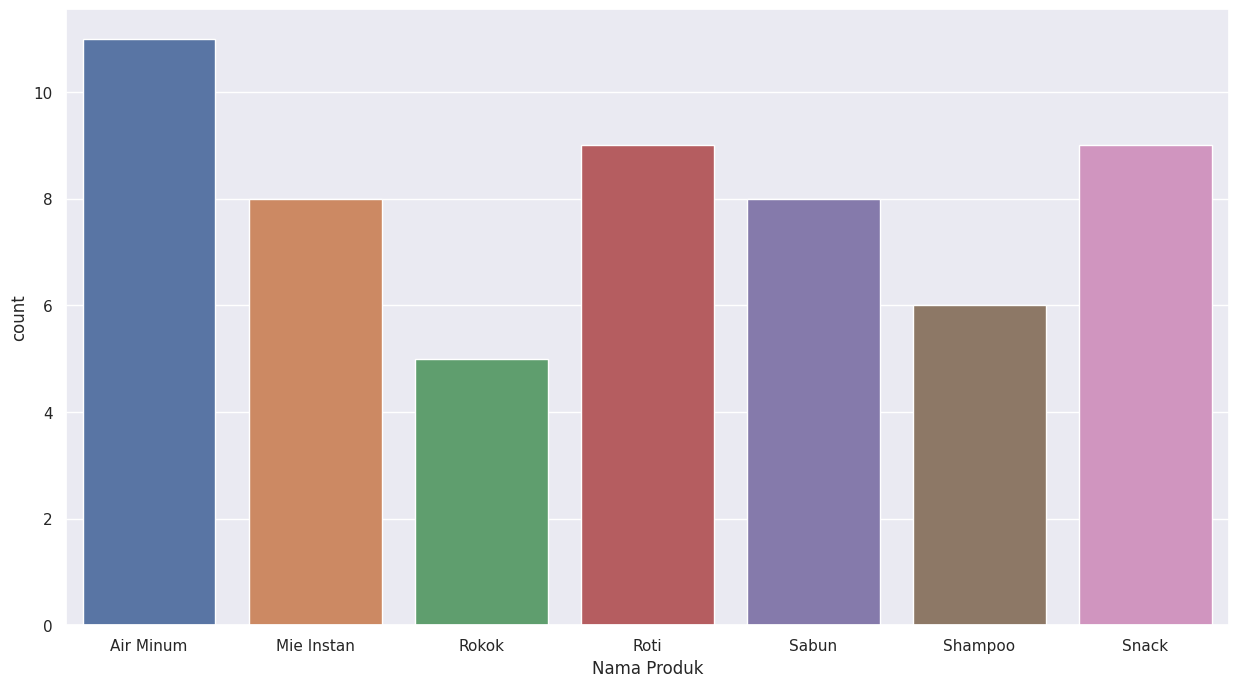

In [20]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Nama Produk')

Frekuensi pembelian tertinggi yaitu pada produk air minum sedangkan yang terendah adalah rokok

Insight :
1.   berdasarkan output yang diperoleh karena tingkat pembelian pada produk rokok rendah disarankan untuk penempatan produk rokok diletakkan di dekat kasir agar mudah terlihat oleh pembeli.
2.   Karena produk yang jarang dibeli bersamaan, yaitu {Rokok, Air Minum, Roti, Snack, Sabun} disarankan membuat paket hemat sembako.
3. Karena tingkat pembelian pada produk air minum tinggi maka disarankan untuk menambah varian air minum seperti kopi, karena kecenderungan orang indonesia merokok bersamaan dengan minum kopi maka disarankan untuk membuat promo bundling kopi dengan rokok (cross-selling).
4. Karena nilai peluang produk air minum dan roti dibeli secara bersamaan tinggi maka disarankan untuk membuat tata letak kedua produk tersebut berjauhan sehingga konsumen dapat melihat produk lain.
5. Karena frekuensi pembelian produk sabun dan shampoo rendah maka disarankan untuk membuat paket bundling mandi.
6. Untuk memaksimalkan penjualan mi instan dapat disarankan memberi saos sachet gratis setiap pembelian 1 mi instan.

